In [210]:
import pandas as pd
import os
import numpy as np
import matplotlib as plt
os.getcwd()

'/Users/heosangbeom/Desktop/퀀트'

## Preprocessing

## 1. Balance Sheet

In [344]:
data = pd.read_excel("000270.xlsx")
data = pd.DataFrame(data)

In [345]:
data = data.transpose()

In [346]:
data_ts = data.iloc[-13:]

In [347]:
data_account = data.iloc[:len(data)-13,]
account = data_account.loc["Unnamed: 2"]

In [348]:
account = pd.DataFrame(account)
account = account.transpose()

In [349]:
data = pd.concat([account, data_ts], axis=0)

In [350]:
#참고용 : list로 형변환 to make certain row vector as a column
import numpy as np
columns = np.array(data.iloc[0].tolist())

In [351]:
data = data.rename(columns=data.iloc[0])

In [352]:
data = data.iloc[1:]

In [353]:
data = data.iloc[:,2:]

In [405]:
data_bs = data.sort_index()
data_bs

,유동자산,현금및현금성자산,단기금융상품,기타유동금융자산,매출채권,재고자산,기타유동자산,비유동자산,장기금융상품,장기성매출채권,...,기타유동부채,사채,장기차입금,부채총계,지배기업 소유주지분,보통주자본금,이익잉여금,비지배지분,자본총계,부채와자본총계
20081231,11709967000000,1268631000000,137580000000,3330000000,2267563000000,6929485000000,NaN,13873583000000,8806000000,8509000000,...,NaN,1652866000000,827998000000,19763966000000,NaN,1848652000000,NaN,NaN,5819584000000,25583550000000
20091231,9860644000000,2001225000000,489428000000,188863000000,2077101000000,4629694000000,188863000000,14991953000000,5065000000,11647000000,...,29277000000,1987686000000,1961622000000,17349013000000,7248384000000,2054355000000,3620294000000,255200000000,7503584000000,24852597000000
20101231,9763671000000,1615879000000,1298268000000,194849000000,2278562000000,3581101000000,194849000000,16511473000000,4013000000,7597000000,...,31467000000,1412639000000,1342808000000,16027027000000,9983238000000,2101772000000,6113182000000,264879000000,10248117000000,26275144000000
20111231,11075187000000,2304169000000,1630000000000,157833000000,2178699000000,4302865000000,157833000000,19179992000000,21033000000,2322000000,...,58286000000,1696312000000,783898000000,16745469000000,13509721000000,2132452000000,9224715000000,-11000000,13509710000000,30255179000000
20121231,11139430000000,1903309000000,2367230000000,208457000000,1801731000000,4222950000000,208457000000,21258884000000,58990000000,2675000000,...,50852000000,1520811000000,934160000000,15550252000000,16848062000000,2139317000000,12663024000000,NaN,16848062000000,32398314000000
20131231,13472386000000,2311264000000,4035379000000,162376000000,2072818000000,4331367000000,162376000000,22709654000000,294377000000,1662000000,...,37673000000,1081778000000,604968000000,15927245000000,20254795000000,2139317000000,16301812000000,NaN,20254795000000,36182040000000
20141231,16655401000000,2478470000000,3458889000000,381056000000,2419265000000,6080582000000,381056000000,24388801000000,84349000000,3836000000,...,38717000000,812363000000,2069900000000,18560337000000,22483865000000,2139317000000,18815654000000,NaN,22483865000000,41044202000000
20151231,18390784000000,1104928000000,2875137000000,NaN,2388911000000,7695346000000,319386000000,27589329000000,93352000000,3145000000,...,48413000000,927052000000,2604889000000,21776082000000,24204031000000,2139317000000,21039080000000,NaN,24204031000000,45980113000000
20161231,20912221000000,3064191000000,3482272000000,NaN,2402540000000,8854373000000,380736000000,29977039000000,115576000000,3803000000,...,47552000000,1665407000000,2271634000000,24309836000000,26579424000000,2139317000000,23465759000000,NaN,26579424000000,50889260000000
20171231,21642079000000,1561738000000,5298287000000,2842132000000,2092975000000,8543645000000,95697000000,30652359000000,81770000000,3392000000,...,67729000000,3019968000000,1874732000000,25433261000000,26861177000000,2139317000000,24074322000000,NaN,26861177000000,52294438000000


In [412]:
data_bs.columns

Index(['유동자산', '현금및현금성자산', '단기금융상품', '기타유동금융자산', '매출채권', '재고자산', '기타유동자산',
       '비유동자산', '장기금융상품', '장기성매출채권', '유형자산', '투자부동산', '무형자산', '자산총계', '유동부채',
       '단기차입금', '유동성장기부채', '기타유동부채', '사채', '장기차입금', '부채총계', '지배기업 소유주지분',
       '보통주자본금', '이익잉여금', '비지배지분', '자본총계', '부채와자본총계'],
      dtype='object')

In [414]:
data_bs.dtypes

유동자산          object
현금및현금성자산      object
단기금융상품        object
기타유동금융자산      object
매출채권          object
재고자산          object
기타유동자산        object
비유동자산         object
장기금융상품        object
장기성매출채권       object
유형자산          object
투자부동산         object
무형자산          object
자산총계          object
유동부채          object
단기차입금         object
유동성장기부채       object
기타유동부채        object
사채            object
장기차입금         object
부채총계          object
지배기업 소유주지분    object
보통주자본금        object
이익잉여금         object
비지배지분         object
자본총계          object
부채와자본총계       object
dtype: object

In [437]:
data_bs.isna().sum()

유동자산          0
현금및현금성자산      0
단기금융상품        0
기타유동금융자산      2
매출채권          0
재고자산          0
기타유동자산        1
비유동자산         0
장기금융상품        0
장기성매출채권       0
유형자산          0
투자부동산         1
무형자산          0
자산총계          0
유동부채          0
단기차입금         0
유동성장기부채       1
기타유동부채        1
사채            0
장기차입금         0
부채총계          0
지배기업 소유주지분    1
보통주자본금        0
이익잉여금         1
자본총계          0
부채와자본총계       0
dtype: int64

In [447]:
# 결측치 대체 with median
fill_na_1 = data_bs['기타유동금융자산'].median()
fill_na_2 = data_bs['기타유동자산'].median()
fill_na_3 = data_bs['투자부동산'].median()
fill_na_4 = data_bs['유동성장기부채'].median()
fill_na_5 = data_bs['기타유동부채'].median()
fill_na_6 = data_bs['지배기업 소유주지분'].median()
fill_na_7 = data_bs['이익잉여금'].median()

19927367000000.0

In [458]:
data_bs["기타유동금융자산"] = data_bs["기타유동금융자산"].fillna(fill_na_1)
data_bs["기타유동자산"] = data_bs["기타유동자산"].fillna(fill_na_2)
data_bs["투자부동산"] = data_bs["투자부동산"].fillna(fill_na_3)
data_bs["유동성장기부채"] = data_bs["유동성장기부채"].fillna(fill_na_4)
data_bs["기타유동부채"] = data_bs["기타유동부채"].fillna(fill_na_5)
data_bs["지배기업 소유주지분"] = data_bs["지배기업 소유주지분"].fillna(fill_na_6)
data_bs["이익잉여금"] = data_bs["이익잉여금"].fillna(fill_na_1)

data_bs

,유동자산,현금및현금성자산,단기금융상품,기타유동금융자산,매출채권,재고자산,기타유동자산,비유동자산,장기금융상품,장기성매출채권,...,유동성장기부채,기타유동부채,사채,장기차입금,부채총계,지배기업 소유주지분,보통주자본금,이익잉여금,자본총계,부채와자본총계
20081231,11709967000000,1268631000000,137580000000,"3,330,000,000.0",2267563000000,6929485000000,"175,619,500,000.0",13873583000000,8806000000,8509000000,...,"990,227,000,000.0","49,632,500,000.0",1652866000000,827998000000,19763966000000,"23,343,948,000,000.0",1848652000000,"208,457,000,000.0",5819584000000,25583550000000
20091231,9860644000000,2001225000000,489428000000,"188,863,000,000.0",2077101000000,4629694000000,"188,863,000,000.0",14991953000000,5065000000,11647000000,...,"1,844,777,000,000.0","29,277,000,000.0",1987686000000,1961622000000,17349013000000,"7,248,384,000,000.0",2054355000000,"3,620,294,000,000.0",7503584000000,24852597000000
20101231,9763671000000,1615879000000,1298268000000,"194,849,000,000.0",2278562000000,3581101000000,"194,849,000,000.0",16511473000000,4013000000,7597000000,...,"1,428,676,000,000.0","31,467,000,000.0",1412639000000,1342808000000,16027027000000,"9,983,238,000,000.0",2101772000000,"6,113,182,000,000.0",10248117000000,26275144000000
20111231,11075187000000,2304169000000,1630000000000,"157,833,000,000.0",2178699000000,4302865000000,"157,833,000,000.0",19179992000000,21033000000,2322000000,...,"1,509,886,000,000.0","58,286,000,000.0",1696312000000,783898000000,16745469000000,"13,509,721,000,000.0",2132452000000,"9,224,715,000,000.0",13509710000000,30255179000000
20121231,11139430000000,1903309000000,2367230000000,"208,457,000,000.0",1801731000000,4222950000000,"208,457,000,000.0",21258884000000,58990000000,2675000000,...,"289,412,000,000.0","50,852,000,000.0",1520811000000,934160000000,15550252000000,"16,848,062,000,000.0",2139317000000,"12,663,024,000,000.0",16848062000000,32398314000000
20131231,13472386000000,2311264000000,4035379000000,"162,376,000,000.0",2072818000000,4331367000000,"162,376,000,000.0",22709654000000,294377000000,1662000000,...,"758,648,000,000.0","37,673,000,000.0",1081778000000,604968000000,15927245000000,"20,254,795,000,000.0",2139317000000,"16,301,812,000,000.0",20254795000000,36182040000000
20141231,16655401000000,2478470000000,3458889000000,"381,056,000,000.0",2419265000000,6080582000000,"381,056,000,000.0",24388801000000,84349000000,3836000000,...,"419,097,000,000.0","38,717,000,000.0",812363000000,2069900000000,18560337000000,"22,483,865,000,000.0",2139317000000,"18,815,654,000,000.0",22483865000000,41044202000000
20151231,18390784000000,1104928000000,2875137000000,"208,457,000,000.0",2388911000000,7695346000000,"319,386,000,000.0",27589329000000,93352000000,3145000000,...,"1,268,666,000,000.0","48,413,000,000.0",927052000000,2604889000000,21776082000000,"24,204,031,000,000.0",2139317000000,"21,039,080,000,000.0",24204031000000,45980113000000
20161231,20912221000000,3064191000000,3482272000000,"208,457,000,000.0",2402540000000,8854373000000,"380,736,000,000.0",29977039000000,115576000000,3803000000,...,"1,255,151,000,000.0","47,552,000,000.0",1665407000000,2271634000000,24309836000000,"26,579,424,000,000.0",2139317000000,"23,465,759,000,000.0",26579424000000,50889260000000
20171231,21642079000000,1561738000000,5298287000000,"2,842,132,000,000.0",2092975000000,8543645000000,"95,697,000,000.0",30652359000000,81770000000,3392000000,...,"861,421,000,000.0","67,729,000,000.0",3019968000000,1874732000000,25433261000000,"26,861,177,000,000.0",2139317000000,"24,074,322,000,000.0",26861177000000,52294438000000


## 2. Income Statement

In [576]:
data_is = pd.read_excel("000270.xlsx", sheet_name="Data_is")
data_is = data_is.transpose()

data_is = pd.DataFrame(data_is)

In [577]:
data_is = data_is.rename(columns=data_is.iloc[2])
data_is

,label_ko,NaN,매출액,매출원가,매출총이익,판매비와관리비,판매비,관리비,영업이익,공동기업 및 관계기업투자손익,...,금융비용,기타손익,기타수익,기타비용,법인세비용차감전순이익,법인세비용,당기순이익,지배기업소유주지분순이익,비지배지분순이익,기본주당이익
Unnamed: 0,NaN,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
"[D310000] Income statement, by function of expense - Consolidated financial statements (Unit: KRW)",concept_id,NaN,ifrs-full_Revenue,ifrs-full_CostOfSales,ifrs-full_GrossProfit,dart_TotalSellingGeneralAdministrativeExpenses,dart_MiscellaneousExpenses,dart_LeaseholdAdministrationExpense,dart_OperatingIncomeLoss,dart_OtherGains,...,entity00106641_udf_IS_201711714125766_FinanceI...,entity00106641_udf_IS_201711782053269_IncomeSt...,entity00106641_udf_IS_201711782139177_udf_IS_2...,entity00106641_udf_IS_20171178221526_udf_IS_20...,ifrs-full_ProfitLossBeforeTax,ifrs-full_IncomeTaxExpenseContinuingOperations,ifrs-full_ProfitLoss,ifrs-full_ProfitLossAttributableToOwnersOfParent,ifrs-full_ProfitLossAttributableToNoncontrolli...,ifrs-full_BasicEarningsLossPerShare
Unnamed: 2,label_ko,NaN,매출액,매출원가,매출총이익,판매비와관리비,판매비,관리비,영업이익,공동기업 및 관계기업투자손익,...,금융비용,기타손익,기타수익,기타비용,법인세비용차감전순이익,법인세비용,당기순이익,지배기업소유주지분순이익,비지배지분순이익,기본주당이익
Unnamed: 3,label_en,NaN,Revenue(Sales),Cost of sales,Gross profit,Selling general administrative expenses,Miscellaneous expenses,Leasehold administration expense,Operating income(loss),"Other income (expense) from subsidiaries, join...",...,Finance costs,Other gain or loss,Other gains,Other costs,Profit (loss) before tax,Income tax expense,Profit (loss),"Profit (loss), attributable to owners of parent","Profit (loss), attributable to non-controlling...",Basic earnings (loss) per share
Unnamed: 4,class0,NaN,손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],...,손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract],손익계산서 [abstract]
Unnamed: 5,class1,NaN,매출액,매출원가,매출총이익,판매비와관리비,판매비와관리비,판매비와관리비,영업이익,공동기업 및 관계기업투자손익,...,금융손익,기타손익,기타손익,기타손익,법인세비용차감전순이익,법인세비용,당기순이익,당기순이익의 귀속,당기순이익의 귀속,주당이익 [abstract]
Unnamed: 6,class2,NaN,NaN,NaN,NaN,NaN,판매비,관리비,NaN,NaN,...,금융비용,NaN,기타수익,기타비용,NaN,NaN,NaN,지배기업소유주지분순이익,비지배지분순이익,기본주당이익
20200101-20201231,"('연결재무제표',)",NaN,59168096000000,49222564000000,9945532000000,7879075000000,4910714000000,2968361000000,2066457000000,61399000000,...,424756000000,-203586000000,601545000000,805131000000,1841358000000,353773000000,1487585000000,1487585000000,NaN,3710
20190101-20191231,"('연결재무제표',)",NaN,58145959000000,48766570000000,9379389000000,7369709000000,4261276000000,3108433000000,2009680000000,507105000000,...,292273000000,68790000000,708224000000,639434000000,2531104000000,704445000000,1826659000000,1826659000000,NaN,4556
20180101-20181231,"('연결재무제표',)",NaN,54169813000000,46177283000000,7992530000000,6835055000000,3904977000000,2930078000000,1157475000000,616829000000,...,317096000000,-242255000000,311205000000,553460000000,1468644000000,312701000000,1155943000000,1155943000000,NaN,2883


In [578]:
data_is = data_is.iloc[-13:,2:]
data_is = data_is.sort_index()
data_is

,매출액,매출원가,매출총이익,판매비와관리비,판매비,관리비,영업이익,공동기업 및 관계기업투자손익,금융손익,금융수익,금융비용,기타손익,기타수익,기타비용,법인세비용차감전순이익,법인세비용,당기순이익,지배기업소유주지분순이익,비지배지분순이익,기본주당이익
20080101-20081231,22217661000000,17560181000000,4657480000000,4656816000000,NaN,NaN,664000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-297044000000,-191078000000,NaN,NaN,NaN,-260000000
20090101-20091231,29257392000000,22875853000000,6381539000000,5186333000000,NaN,NaN,1195206000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1220714000000,200082000000,NaN,NaN,NaN,2667000000
20100101-20101231,35826955000000,27905367000000,7921588000000,NaN,3715920000000,1835816000000,2369852000000,981661000000,NaN,197551000000,346193000000,NaN,420545000000,300369000000,3323047000000,624717000000,2698330000000,2682119000000,16211000000,6843000000
20110101-20111231,43190942000000,33138961000000,10051981000000,6552893000000,4451317000000,2101576000000,3499088000000,1336618000000,-140114000000,180102000000,320216000000,26058000000,457378000000,431320000000,4721650000000,1202414000000,3519236000000,3415577000000,103659000000,8573
20120101-20121231,47242933000000,36536005000000,10706928000000,7184677000000,4845860000000,2338817000000,3522251000000,1414080000000,191650000000,402795000000,211145000000,36075000000,417339000000,381264000000,5164056000000,1299352000000,3864704000000,3864687000000,17000000,9546
20130101-20131231,47597897000000,37511941000000,10085956000000,6908856000000,4411711000000,2497145000000,3177100000000,1319585000000,315833000000,455275000000,139442000000,16058000000,377188000000,361130000000,4828576000000,1011517000000,3817059000000,3817059000000,NaN,9425
20140101-20141231,47097049000000,37754115000000,9342934000000,6770385000000,4186289000000,2584096000000,2572549000000,1394152000000,81469000000,250814000000,169345000000,-231854000000,459684000000,691538000000,3816316000000,822723000000,2993593000000,2993593000000,NaN,7393
20150101-20151231,49521447000000,39653769000000,9867678000000,7513405000000,4711708000000,2801697000000,2354273000000,894873000000,83642000000,359567000000,275925000000,-232522000000,657123000000,889645000000,3100266000000,469666000000,2630600000000,2630600000000,NaN,6559
20160101-20161231,52712906000000,42281590000000,10431316000000,7969836000000,5127449000000,2842387000000,2461480000000,1159899000000,-43415000000,249938000000,293353000000,-135930000000,817114000000,953044000000,3442034000000,687394000000,2754640000000,2754640000000,NaN,6873
20170101-20171231,53535680000000,44618696000000,8916984000000,8254758000000,5373702000000,2881056000000,662226000000,563952000000,157749000000,408718000000,250969000000,-243874000000,644051000000,887925000000,1140053000000,172035000000,968018000000,968018000000,NaN,2414


In [579]:
data_is.isna().sum()

매출액                 0
매출원가                0
매출총이익               0
판매비와관리비             1
판매비                 2
관리비                 2
영업이익                0
공동기업 및 관계기업투자손익     2
금융손익                3
금융수익                2
금융비용                2
기타손익                3
기타수익                2
기타비용                2
법인세비용차감전순이익         0
법인세비용               0
당기순이익               2
지배기업소유주지분순이익        2
비지배지분순이익           10
기본주당이익              0
dtype: int64

In [582]:
is_fillna_1 = data_is["판매비와관리비"].median()
is_fillna_2 = data_is["공동기업 및 관계기업투자손익"].median()
is_fillna_3 = data_is["금융손익"].median()
is_fillna_4 = data_is["금융수익"].median()
is_fillna_5 = data_is["금융비용"].median()
is_fillna_6 = data_is["기타손익"].median()
is_fillna_7 = data_is["기타수익"].median()
is_fillna_8 = data_is["기타비용"].median()
is_fillna_9 = data_is["당기순이익"].median()
is_fillna_10 = data_is["지배기업소유주지분순이익"].median()

data_is["판매비와관리비"] = data_is["판매비와관리비"].fillna(is_fillna_1)
data_is["공동기업 및 관계기업투자손익"] = data_is["공동기업 및 관계기업투자손익"].fillna(is_fillna_2)
data_is["금융손익"] = data_is["금융손익"].fillna(is_fillna_3)
data_is["금융수익"] = data_is["금융수익"].fillna(is_fillna_4)
data_is["금융비용"] = data_is["금융비용"].fillna(is_fillna_5)
data_is["기타손익"] = data_is["기타손익"].fillna(is_fillna_6)
data_is["기타수익"] = data_is["기타수익"].fillna(is_fillna_7)
data_is["기타비용"] = data_is["기타비용"].fillna(is_fillna_8)
data_is["당기순이익"] = data_is["당기순이익"].fillna(is_fillna_9)
data_is["지배기업소유주지분순이익"] = data_is["지배기업소유주지분순이익"].fillna(is_fillna_10)

data_is = data_is.drop(["판매비"], axis=1)
data_is = data_is.drop(["관리비"], axis=1)
data_is = data_is.drop(["비지배지분순이익"], axis=1)

data_is.isnull().sum()

매출액                0
매출원가               0
매출총이익              0
판매비와관리비            0
영업이익               0
공동기업 및 관계기업투자손익    0
금융손익               0
금융수익               0
금융비용               0
기타손익               0
기타수익               0
기타비용               0
법인세비용차감전순이익        0
법인세비용              0
당기순이익              0
지배기업소유주지분순이익       0
기본주당이익             0
dtype: int64

## 3. Cashflow Statement

In [411]:
data_cf = pd.read_excel("000270.xlsx", sheet_name="Data_cf")
data_cf = data_cf.transpose()
data_cf = data_cf.rename(columns=data_cf.iloc[2])

data_cf = data_cf.iloc[-13:,2:]
data_cf = data_cf.sort_index()

data_cf

,영업활동현금흐름,영업에서 창출된 현금흐름,이자의 수취,이자의 지급,배당금의 수취,법인세 부담액,투자활동현금흐름,투자활동으로 인한 현금유입,단기금융상품의 순증감,기타유동금융자산의 순증감,...,재무활동으로 인한 현금유출,차입금의 상환,사채의 상환,배당금의 지급,리스료의 지급,기타재무활동으로 인한 현금유출,외화표시 현금의 환율변동효과,현금및현금성자산의순증감,기초의 현금및현금성자산,기말의 현금및현금성자산
20080101-20081231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090101-20091231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100101-20101231,5272537000000,5586505000000,27265000000,296174000000,69425000000,114484000000,-2296053000000,65742000000,NaN,NaN,...,4175280000000,2958274000000,872712000000,96992000000,83178000000,1803000000,-18532000000,-385346000000,2001225000000,1615879000000
20110101-20111231,4745189000000,4997468000000,118136000000,185779000000,306261000000,490897000000,-2630548000000,416867000000,NaN,NaN,...,3024739000000,1485266000000,779807000000,198735000000,0,2780000000,14605000000,688290000000,1615879000000,2304169000000
20120101-20121231,4345425000000,5153910000000,136171000000,156640000000,377337000000,1165353000000,-2842577000000,297795000000,NaN,NaN,...,2330790000000,972852000000,1108143000000,242167000000,5546000000,2076000000,-93594000000,-400860000000,2304169000000,1903309000000
20130101-20131231,4776593000000,5051324000000,189032000000,106408000000,430336000000,787691000000,-3513940000000,229614000000,NaN,NaN,...,791920000000,421251000000,100000000000,263240000000,5860000000,1569000000,-63491000000,407955000000,1903309000000,2311264000000
20140101-20141231,2363825000000,2679387000000,231950000000,90707000000,467969000000,924774000000,-2983406000000,1163798000000,NaN,NaN,...,1245312000000,460184000000,426590000000,283489000000,6962000000,3592000000,-199704000000,167206000000,2311264000000,2478470000000
20150101-20151231,3375248000000,3567053000000,199573000000,119184000000,294132000000,566326000000,-5613823000000,82937000000,-611108000000,NaN,...,1237161000000,381576000000,300000000000,404058000000,5278000000,38000000,-41364000000,-1373542000000,2478470000000,1104928000000
20160101-20161231,3275882000000,3845239000000,140549000000,151931000000,195886000000,753861000000,-2312301000000,1347199000000,NaN,NaN,...,1846568000000,507538000000,761800000000,441025000000,4392000000,NaN,50281000000,1959263000000,1104928000000,3064191000000
20170101-20171231,2594190000000,3046566000000,154397000000,196296000000,133020000000,543497000000,-4794566000000,99830000000,NaN,NaN,...,1754096000000,1210185000000,100000000000,441024000000,1343000000,1544000000,-33965000000,-1502453000000,3064191000000,1561738000000


In [536]:
data_cf.isnull().sum()

영업활동현금흐름            2
영업에서 창출된 현금흐름       2
이자의 수취              2
이자의 지급              2
배당금의 수취             2
법인세 부담액             2
투자활동현금흐름            2
투자활동으로 인한 현금유입      2
유형자산의 처분            2
무형자산의 처분            3
투자활동으로 인한 현금유출      2
관계기업투자의 취득          0
유형자산의 취득            2
무형자산의 취득            2
재무활동현금흐름            2
재무활동으로 인한 현금유입      2
차입금의 증가             3
사채의 발행              5
기타재무활동으로 인한 현금유입    2
재무활동으로 인한 현금유출      2
차입금의 상환             2
사채의 상환              4
배당금의 지급             2
리스료의 지급             4
기타재무활동으로 인한 현금유출    3
외화표시 현금의 환율변동효과     2
현금및현금성자산의순증감        2
기초의 현금및현금성자산        2
기말의 현금및현금성자산        2
dtype: int64

In [542]:
data_cf.dtypes

영업활동현금흐름            object
영업에서 창출된 현금흐름       object
이자의 수취              object
이자의 지급              object
배당금의 수취             object
법인세 부담액             object
투자활동현금흐름            object
투자활동으로 인한 현금유입      object
유형자산의 처분            object
무형자산의 처분            object
투자활동으로 인한 현금유출      object
관계기업투자의 취득          object
유형자산의 취득            object
무형자산의 취득            object
재무활동현금흐름            object
재무활동으로 인한 현금유입      object
차입금의 증가             object
사채의 발행              object
기타재무활동으로 인한 현금유입    object
재무활동으로 인한 현금유출      object
차입금의 상환             object
사채의 상환              object
배당금의 지급             object
리스료의 지급             object
기타재무활동으로 인한 현금유출    object
외화표시 현금의 환율변동효과     object
현금및현금성자산의순증감        object
기초의 현금및현금성자산        object
기말의 현금및현금성자산        object
dtype: object

In [539]:
data_cf.columns

Index(['영업활동현금흐름', '영업에서 창출된 현금흐름', '이자의 수취', '이자의 지급', '배당금의 수취', '법인세 부담액',
       '투자활동현금흐름', '투자활동으로 인한 현금유입', '유형자산의 처분', '무형자산의 처분', '투자활동으로 인한 현금유출',
       '관계기업투자의 취득', '유형자산의 취득', '무형자산의 취득', '재무활동현금흐름', '재무활동으로 인한 현금유입',
       '차입금의 증가', '사채의 발행', '기타재무활동으로 인한 현금유입', '재무활동으로 인한 현금유출', '차입금의 상환',
       '사채의 상환', '배당금의 지급', '리스료의 지급', '기타재무활동으로 인한 현금유출', '외화표시 현금의 환율변동효과',
       '현금및현금성자산의순증감', '기초의 현금및현금성자산', '기말의 현금및현금성자산'],
      dtype='object')

In [551]:
# 컬럼별로 다른 값을 연산하는 반복문 쓰는 방법!!!!!

range = data_cf.columns 

for i in range:
    data_cf[i] = data_cf[i].fillna(data_cf[i].median())

data_cf.isna().sum()

영업활동현금흐름            0
영업에서 창출된 현금흐름       0
이자의 수취              0
이자의 지급              0
배당금의 수취             0
법인세 부담액             0
투자활동현금흐름            0
투자활동으로 인한 현금유입      0
유형자산의 처분            0
무형자산의 처분            0
투자활동으로 인한 현금유출      0
관계기업투자의 취득          0
유형자산의 취득            0
무형자산의 취득            0
재무활동현금흐름            0
재무활동으로 인한 현금유입      0
차입금의 증가             0
사채의 발행              0
기타재무활동으로 인한 현금유입    0
재무활동으로 인한 현금유출      0
차입금의 상환             0
사채의 상환              0
배당금의 지급             0
리스료의 지급             0
기타재무활동으로 인한 현금유출    0
외화표시 현금의 환율변동효과     0
현금및현금성자산의순증감        0
기초의 현금및현금성자산        0
기말의 현금및현금성자산        0
dtype: int64

In [586]:
# concat하기 위해 index 동일하게 맞춰주기
data_is = data_is.set_index(data_bs.index)
data_cf = data_cf.set_index(data_bs.index)

data = pd.concat([data_bs, data_is, data_cf], axis=1)

data.shape

(13, 72)

# Factor Calculation

## 1. BM Ratios
### Book to Market
* $Common\,Shareholders'\,Equity\,/\,Market\,Cap$

-------
## 2. EP Ratios
### PER
* $Price\,per\,Share\,/EPS=Market\,Cap\,/Net\,Income$
 
### PBR
* $Price\,per\,Share\,/\,BPS=Market\,Cap\,/\,Total \,Equity$

### PSR
* $Price\,per\,Share\,/\,SPS=Market\,Cap\,/\,Sales$

### EV/EBITDA
* $Enterprise\,Value\,/\,EBITDA = (Equity\,Value + Net\, Debt)/EBITDA$

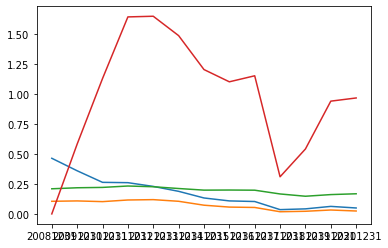

In [602]:
# Profitability
data["ROE"] = data["당기순이익"]/data["자본총계"]
data["ROA"] = data["당기순이익"]/data["자산총계"]
data["GP"] = data["매출총이익"]/data["매출액"]
data["ROTC"] = data["영업이익"]/data["보통주자본금"]

import matplotlib.pyplot as plt
X = data.index

plt.plot(X, data["ROE"])
plt.plot(X, data["ROA"])
plt.plot(X, data["GP"])
plt.plot(X, data["ROTC"])

### ROE (Return on Equity)
- $Net\,Income\,/\,Total\,Equity$

### ROA (Return on Asset)
- $Net\,Income\,/\,Total\,Asset$

### Gross Profit Ratio
- $Gross\,Profit\,/\,Sales=(Sales-COGS)/Sales$

where COGS stands for Cost of Goods Sold

### ROTC (Return on Total Capital)
- $NOPAT\,/\,Total\,Capital = EBIT(1-t)\,/\,Total\,Capital$

분자의 경우, EBIT를 써도 무방

### ROIC (Return on Invested Capital)
- $NOPAT\,/\,Invested\,Capital=EBIT(1-t)\,/\,Invested\,Capital$

분자의 경우, EBIT를 써도 무방

### RNOA (Return on Net Operating Asset)
- $Net\,Income/NOA\,=\,Net\,Income\,/(Operating\,Asset - Operating\,Liabilities)\,=\,Operating\,Assets - (Total\, Liabilities - IBD)$

where IBD stands for "Interest Bearing Debts (LTD + STD)"

-------


### cf) Core components for multiple valuation

* Enterprise Value = Equity Value + Net Debt
* Equity Value = Net Income * PER 
* Net Debt = IBD - C&CE = (LTD + STD) - (Cash + Investments)

------
## Sources
* Return on Total Capital : https://corporatefinanceinstitute.com/resources/knowledge/finance/return-on-total-capital/

* Return on Invested Capital : https://www.investopedia.com/terms/r/returnoninvestmentcapital.asp

In [606]:
data.head()

,유동자산,현금및현금성자산,단기금융상품,기타유동금융자산,매출채권,재고자산,기타유동자산,비유동자산,장기금융상품,장기성매출채권,...,리스료의 지급,기타재무활동으로 인한 현금유출,외화표시 현금의 환율변동효과,현금및현금성자산의순증감,기초의 현금및현금성자산,기말의 현금및현금성자산,ROE,ROA,GP,ROTC
20081231,11709967000000,1268631000000,137580000000,"3,330,000,000.0",2267563000000,6929485000000,"175,619,500,000.0",13873583000000,8806000000,8509000000,...,"5,278,000,000.0","2,428,000,000.0","-41,364,000,000.0","407,955,000,000.0","2,292,659,000,000.0","2,304,169,000,000.0",0.4636637257920841,0.10547128916823506,0.2096296275291985,0.00035918063540352647
20091231,9860644000000,2001225000000,489428000000,"188,863,000,000.0",2077101000000,4629694000000,"188,863,000,000.0",14991953000000,5065000000,11647000000,...,"5,278,000,000.0","2,428,000,000.0","-41,364,000,000.0","407,955,000,000.0","2,292,659,000,000.0","2,304,169,000,000.0",0.35960548985658053,0.10857336156861193,0.21811715138519525,0.5817913651730106
20101231,9763671000000,1615879000000,1298268000000,"194,849,000,000.0",2278562000000,3581101000000,"194,849,000,000.0",16511473000000,4013000000,7597000000,...,"83,178,000,000.0","1,803,000,000.0","-18,532,000,000.0","-385,346,000,000.0","2,001,225,000,000.0","1,615,879,000,000.0",0.26330007746788997,0.10269515554320083,0.22110692912640775,1.1275495153613238
20111231,11075187000000,2304169000000,1630000000000,"157,833,000,000.0",2178699000000,4302865000000,"157,833,000,000.0",19179992000000,21033000000,2322000000,...,0.0,"2,780,000,000.0","14,605,000,000.0","688,290,000,000.0","1,615,879,000,000.0","2,304,169,000,000.0",0.2604967834246627,0.116318465674918,0.23273354399170085,1.6408753866441073
20121231,11139430000000,1903309000000,2367230000000,"208,457,000,000.0",1801731000000,4222950000000,"208,457,000,000.0",21258884000000,58990000000,2675000000,...,"5,546,000,000.0","2,076,000,000.0","-93,594,000,000.0","-400,860,000,000.0","2,304,169,000,000.0","1,903,309,000,000.0",0.22938567058929388,0.11928719500650559,0.22663554779717,1.6464371572796364


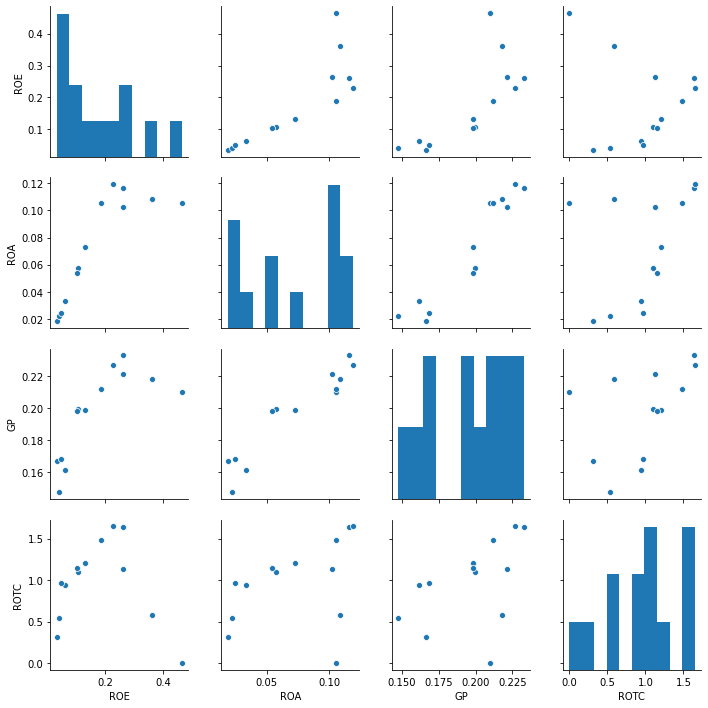

In [640]:
import seaborn as sns

df = data.iloc[:,-4:]
sns.pairplot(df)

In [641]:
# 전체 column 데이터 형변환
for i in data.columns:
    data[i] = pd.to_numeric(data[i])

df.describe()

,ROE,ROA,GP,ROTC
count,13.0,13.0,13.0,13.0
mean,0.17704922327517758,0.07234987401454454,0.19685789008034738,0.9762797413053134
std,0.1328983825191186,0.03911180748708492,0.027467004203497767,0.5010848237206688
min,0.03603781025678808,0.01851091697361773,0.14754582963024074,0.00035918063540352647
25%,0.06303576164900589,0.03300507122638698,0.16808943792952202,0.5817913651730106
50%,0.13314405686033073,0.07293583147261579,0.19926069607780242,1.1004787976723411
75%,0.2604967834246627,0.10549595876849398,0.21811715138519525,1.202509492515602
max,0.4636637257920841,0.11928719500650559,0.23273354399170085,1.6464371572796364
